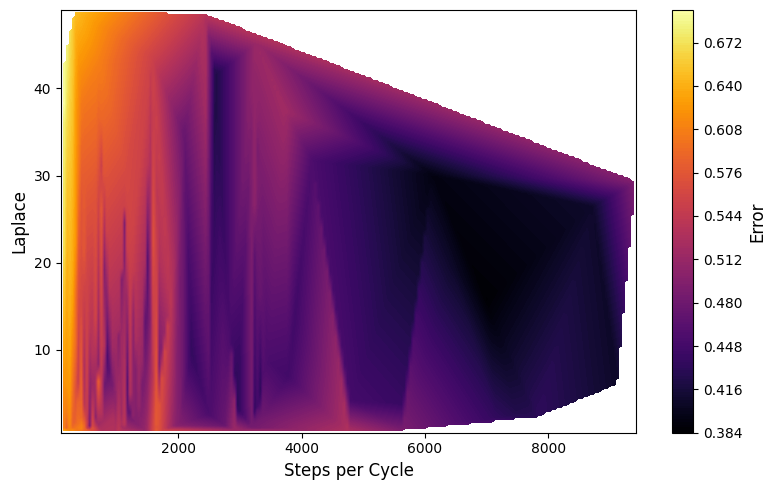

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

df = pd.read_csv("./grid_results.csv")

# Remove the test run
df = df[df["steps_per_cycle"] > 10]

# Extract columns
x = df["steps_per_cycle"]
y = df["laplace"]
z = df["error"]

xi = np.linspace(x.min(), x.max(), 200)
yi = np.linspace(y.min(), y.max(), 200)
Xi, Yi = np.meshgrid(xi, yi)

Zi = griddata((x, y), z, (Xi, Yi), method='linear')

# Plot contour
fig, ax = plt.subplots(figsize=(8, 5))
cp = ax.contourf(Xi, Yi, Zi, levels=200, cmap='inferno')
cbar = fig.colorbar(cp)
cbar.set_label('Error', fontsize=12)
ax.set_xlabel("Steps per Cycle", fontsize=12)
ax.set_ylabel("Laplace", fontsize=12)
fig.tight_layout()
plt.show()
fig.savefig("./figures/grid.png")


In [177]:
import pickle
import numpy as np

with open("./infoset_ocfr.pkl", "rb") as f:
    i = pickle.load(f)

entropies = []
full1 = 0
for key, node in i.items():

    p = node.policy
    N = p.size
    
    if (p > 0.99).any():
        full1 += 1
    H = -np.sum(p * np.log(p + 1e-12)) / np.log(N)
    entropies.append(H)

np.mean(entropies), full1 / len(i)

(np.float64(0.2983590509256048), 0.4700854700854701)

In [146]:
import numpy as np
from matplotlib import pyplot as plt

files = [100, 4000, 8000]

gaps = []
xs = []
names = []

for f in files:
    v = np.load(f"./gap_{f}.npy")
    gaps.append(v)
    names.append(str(f))
    xs.append(np.linspace(0, 2, num=v.size, endpoint=True))

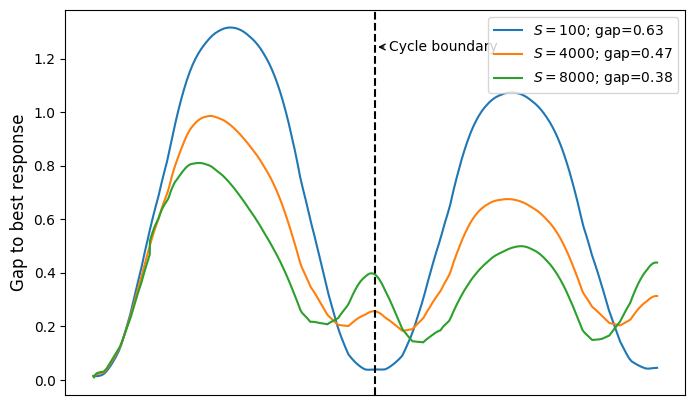

In [147]:

fig, ax = plt.subplots(figsize=(8, 5))

for gap, x, name in zip(gaps, xs, names, strict=True):

    ax.plot(x, gap, label=rf"$S={name}$; gap={np.mean(gap):.2f}")

l = ax.legend(loc="upper right")
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Gap to best response", fontsize=12)
ax.axvline(x=1.0, color="black", linestyle="dashed")

ax.annotate(
    "Cycle boundary",             # Text label
    xy=(1.0, ax.get_ylim()[1] * 0.9),  # Position near top of line
    xytext=(1.05, ax.get_ylim()[1] * 0.9),  # Slightly to the right
    arrowprops=dict(arrowstyle="->", color="black"),
    ha="left",
    va="center",
    fontsize=10,
)
ax.xaxis.set_visible(False)
fig.savefig("./figures/gaps.pdf")

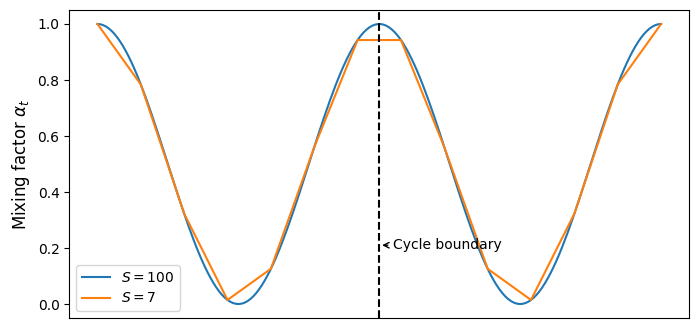

In [ ]:
n_cycles = 2

fig, ax = plt.subplots(figsize=(8, 4))

for ns in [100, 7]:

    steps = n_cycles * ns
    t = np.linspace(0, n_cycles, num=steps, endpoint=True)
    signal = (np.cos(2 * np.pi * 1.0 * t) + 1) / 2
    ax.plot(t, signal, label=rf"$S = {ns}$")


ax.annotate(
    "Cycle boundary",             # Text label
    xy=(1.0, ax.get_ylim()[1] * 0.2),  # Position near top of line
    xytext=(1.05, ax.get_ylim()[1] * 0.2),  # Slightly to the right
    arrowprops=dict(arrowstyle="->", color="black"),
    ha="left",
    va="center",
    fontsize=10,
)
ax.axvline(x=1.0, color="black", linestyle="dashed")
ax.set_ylabel(r"Mixing factor $\alpha_t$", fontsize=12)
ax.legend()
ax.xaxis.set_visible(False)

fig.savefig("./figures/mixer.pdf")